In [1]:
import sys
sys.path.append('../Codes/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [15]:
%%time
L = 9
n_seqs = np.array([1e2, 1e3, 1e4, 1e5])
Array_Sequences = []

for n_seq in n_seqs:
    Sequences = pickle.load( open( Text_files_path + "Sequences_MJ2_L-%d_n_seq-%d.pkl"%(L, n_seq), "rb" ) )
    Array_Sequences.append(Sequences)
    print('Master Seq:', Sequences[0].sequence, 'Antigen Seq:', Sequences[0].complementary_sequence)
Array_Sequences = np.array(Array_Sequences)

Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
Master Seq: ccccbbcbb Antigen Seq: kbbdsgesj
CPU times: user 968 ms, sys: 80.6 ms, total: 1.05 s
Wall time: 1.06 s


<timed exec>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


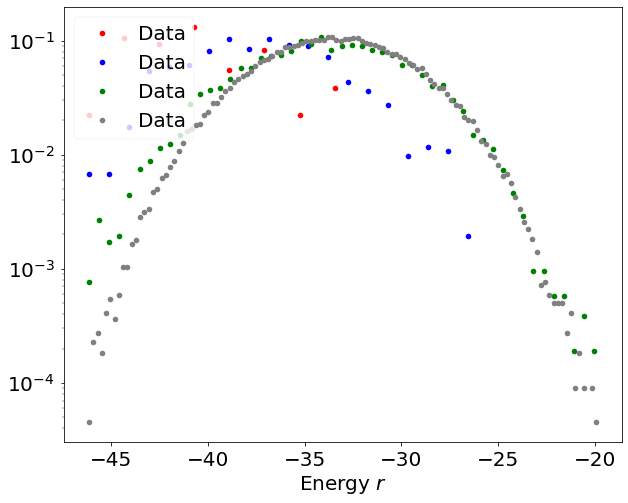

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
colors = ['r', 'b', 'g', 'grey']
for i, Sequences in enumerate(Array_Sequences):
    energies, data_energies = plot_histogram_energy(Sequences = Sequences, normalization = 1, bins = 'auto', color = colors[i], density = True, ax = ax)
#ax.set_xlim(np.min(energies),np.min(energies)+8 )
